# Classifying Handwritten Digits with Deep learning

In this project handwritten digits are classified. The dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) and is imported directly within the namespace of `sklearn.datasets`.

First, the relevant libraries are imported and the dataset is introduced:

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
%matplotlib inline

digits = load_digits()

Each digit is represented by an `8 x 8` image in `8 bit` grayscale (0-255).
In total the dataset contains `1797` images which can be described as observations with `64` features:

In [2]:
print(digits.data.shape)

(1797, 64)


This array is stored in a pandas dataframe:

In [3]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


From this dataset `8` random digits are plotted for demonstration:

[ 804  244 1013 1371  227  994 1134  140]


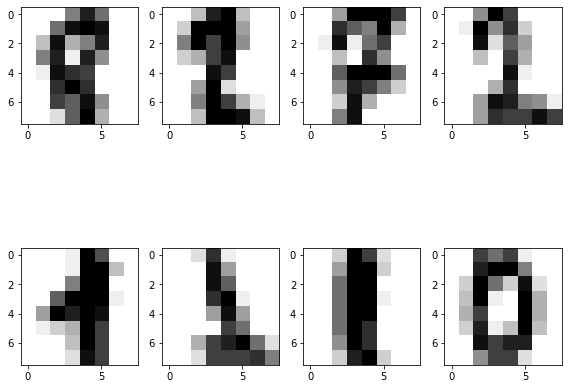

In [4]:
random_features = np.random.randint(df.shape[0], size=8)
print(random_features)

fig = plt.figure(figsize=(8, 8))

for i, feature in enumerate(random_features):
    df_plot = df.iloc[feature]
    df_plot = df_plot.values
    df_plot = df_plot.reshape(8,8)
    ax = fig.add_subplot(2, 4, i+1)
    ax.imshow(df_plot, cmap='gray_r')

plt.tight_layout()
plt.show()

The target variable is given by:

In [5]:
target = pd.Series(digits.target)

Which yields for the images above:

In [6]:
target.iloc[random_features]

804     8
244     2
1013    7
1371    2
227     1
994     1
1134    1
140     0
dtype: int64

## K-Nearest Neighbors Model

For reference a k-nearest neighbors model is utilized to classify the digits. The best model is chosen for k in range `1 - 15`. To validate the model, a `5-fold` cross validation is performed:

<function matplotlib.pyplot.show(close=None, block=None)>

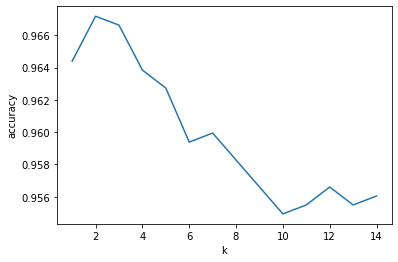

In [7]:
ks = range(1,15)
accuracies = []
accuracies_std = []

for k in ks:
    kn = KNeighborsClassifier(n_neighbors=k)
    knn_cv = cross_val_score(kn, df, target, cv=5)
    accuracies.append(np.mean(knn_cv))
    accuracies_std.append(np.std(knn_cv))

plt.plot(ks,accuracies)  
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show

In [8]:
print(f"The best mean accuracy is{max(accuracies)*100: .1f} % for k={ks[np.argmax(accuracies)]}.")
print(f"The corresponding standard deviation is{accuracies_std[np.argmax(accuracies)] : .3f}.")

The best mean accuracy is 96.7 % for k=2.
The corresponding standard deviation is 0.006.


## Neural Network with One Hidden Layer

Subsequently a neural network from the `MLPClassifier()` class in `sklearn.neural_network` is built and `5-fold` cross validated. The number neurons is varied in range `[8, 16, 32, 64, 128]`:

<function matplotlib.pyplot.show(close=None, block=None)>

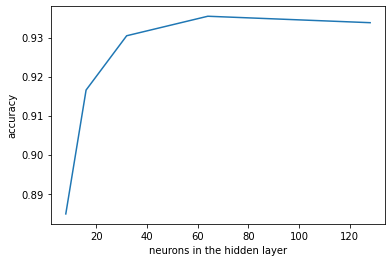

In [9]:
neurons = [8, 16, 32, 64, 128]
accuracies = []
accuracies_std = []

for neuron in neurons: 
    nn = MLPClassifier(hidden_layer_sizes=(neuron,), max_iter=1000, random_state=42)
    nn_cv = cross_val_score(nn, df, target, cv=5)
    accuracies.append(np.mean(nn_cv))
    accuracies_std.append(np.std(nn_cv))

plt.plot(neurons,accuracies)  
plt.xlabel('neurons in the hidden layer')
plt.ylabel('accuracy')
plt.show

In [10]:
print(f"The best mean accuracy is{max(accuracies)*100: .1f} % for {neurons[np.argmax(accuracies)]} neurons in the hidden layer.")
print(f"The corresponding standard deviation is{accuracies_std[np.argmax(accuracies)] : .3f}.")

The best mean accuracy is 93.5 % for 64 neurons in the hidden layer.
The corresponding standard deviation is 0.021.


In the following, equivalent approaches are performed for two and three hidden layers. The number of neurons is varied accordingly but is set to be constant between different layers.

## Neural Network with Two Hidden Layers

<function matplotlib.pyplot.show(close=None, block=None)>

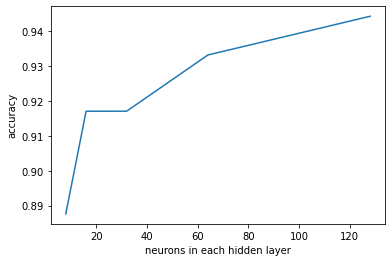

In [11]:
neurons = [8, 16, 32, 64, 128]
accuracies = []
accuracies_std = []

for neuron in neurons: 
    nn = MLPClassifier(hidden_layer_sizes=(neuron,neuron), max_iter=1000, random_state=42)
    nn_cv = cross_val_score(nn, df, target, cv=5)
    accuracies.append(np.mean(nn_cv))
    accuracies_std.append(np.std(nn_cv))

plt.plot(neurons,accuracies)  
plt.xlabel('neurons in each hidden layer')
plt.ylabel('accuracy')
plt.show

In [12]:
print(f"The best mean accuracy is{max(accuracies)*100: .1f} % for {neurons[np.argmax(accuracies)]} neurons in each hidden layer.")
print(f"The corresponding standard deviation is{accuracies_std[np.argmax(accuracies)] : .3f}.")

The best mean accuracy is 94.4 % for 128 neurons in each hidden layer.
The corresponding standard deviation is 0.018.


## Neural Network with Three Hidden Layers

<function matplotlib.pyplot.show(close=None, block=None)>

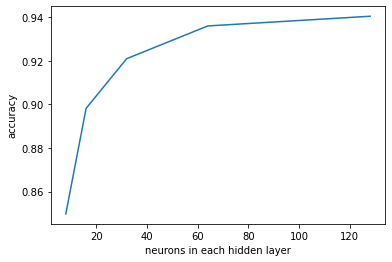

In [13]:
neurons = [8, 16, 32, 64, 128]
accuracies = []
accuracies_std = []

for neuron in neurons: 
    nn = MLPClassifier(hidden_layer_sizes=(neuron,neuron,neuron), max_iter=1000, random_state=42)
    nn_cv = cross_val_score(nn, df, target, cv=5)
    accuracies.append(np.mean(nn_cv))
    accuracies_std.append(np.std(nn_cv))

plt.plot(neurons,accuracies)  
plt.xlabel('neurons in each hidden layer')
plt.ylabel('accuracy')
plt.show

In [14]:
print(f"The best mean accuracy is{max(accuracies)*100: .1f} % for {neurons[np.argmax(accuracies)]} neurons in each hidden layer.")
print(f"The corresponding standard deviation is{accuracies_std[np.argmax(accuracies)] : .3f}.")

The best mean accuracy is 94.0 % for 128 neurons in each hidden layer.
The corresponding standard deviation is 0.027.


## Summary

Three neural networks with `one`, `two` and `three` hidden layers and a constant number of neurons per layer are built. The number of neurons is varied for different iterations (`8, 16, 32, 64, 128`). The best model utilizes two hidden layers with `128` neurons each. The model with one hidden layer shows signs of overfitting for the number of neurons `> 64`.

The performance of the k-nearest neighbors algorithm could not be matched. However, this approach has high demands on memory usage and there is no model representation for debugging and exploration.

Future work could be done on evaluating different activations functions or further investigations on the number of hidden layers and / or neurons.